## This section performs basic **Exploratory Data Analysis (EDA)** using the space mission dataset.
We're using **Pandas** for data handling and **Seaborn + Matplotlib** for visualizations.

Key steps:

Count the total number of space missions to understand dataset size.

Identify top organizations by number of launches using .value_counts().

Visualize the distribution of mission outcomes (Success, Failure, Partial) to assess launch reliability.

Check the rocket status (Active vs Retired) to see how many are still in use.

Analyze the most frequently used rockets by extracting rocket names from the Detail column.

Compare top 3 Countries over time in terms of success and launches.

Analyze rocket reuse and performance (same rocket used multiple times).

Track cost trends over decades — are missions getting cheaper or costlier?

Compare private vs government missions in terms of count and success.

*These visual insights help uncover patterns in the dataset like dominant agencies, rocket reusability, and operational success — which are crucial for future predictive modeling or trend analysis.*


Total Space Missions: 4324



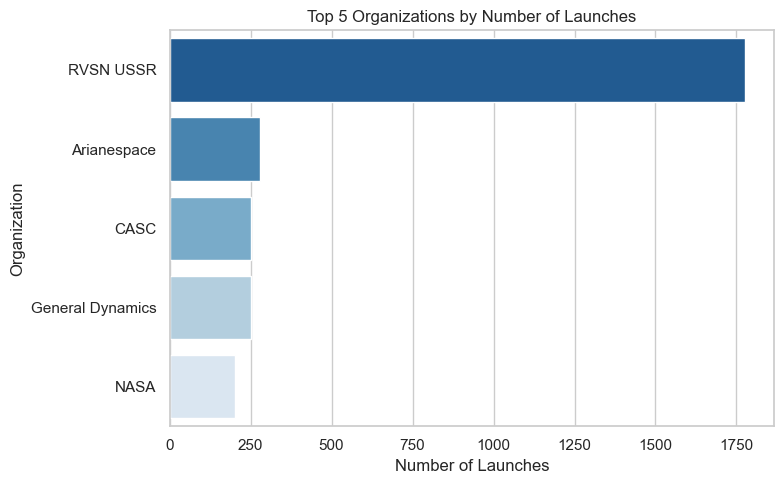

RVSN USSR has the most launches, probably from Cold War era. NASA and others follow.


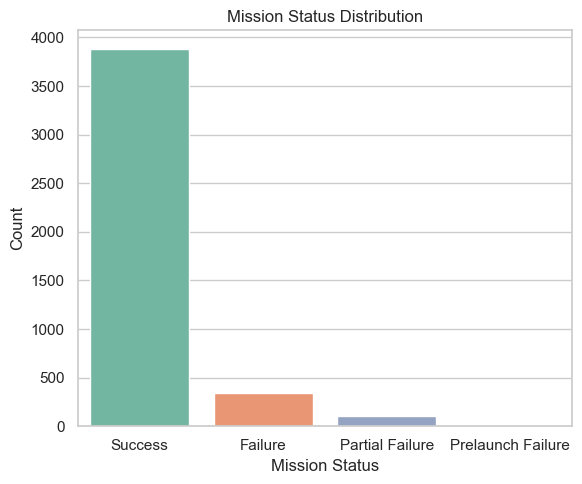

Most missions are successful. Some failed or had partial issues.


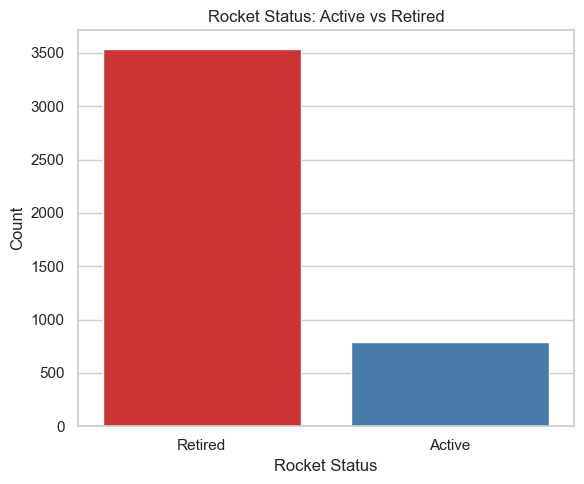

Majority of rockets are retired, which makes sense due to age.


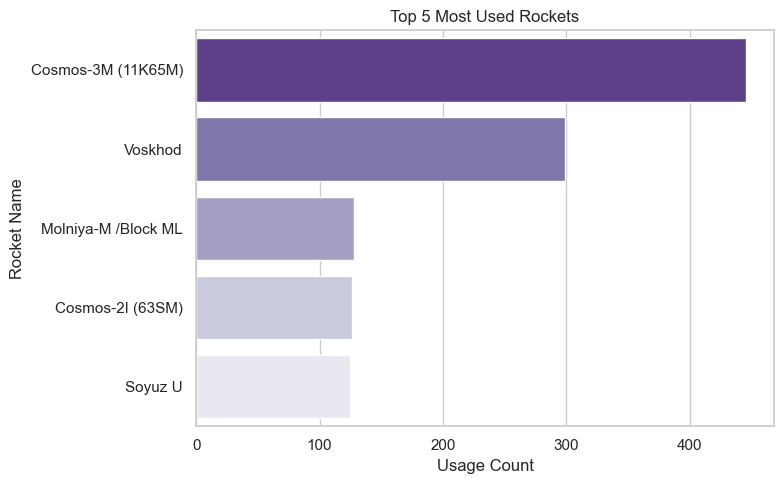

Rockets like Cosmos-3M were used a lot. They were probably reliable and affordable.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("space_mission_data_cleaned.csv")

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Total missions
total_missions = len(df)
print(f"\nTotal Space Missions: {total_missions}\n")

# Top 5 organisations
top_orgs = df['Organisation'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_orgs.values, y=top_orgs.index, hue=top_orgs.index, legend=False, palette="Blues_r")
plt.title("Top 5 Organizations by Number of Launches")
plt.xlabel("Number of Launches")
plt.ylabel("Organization")
plt.tight_layout()
plt.show()
print("RVSN USSR has the most launches, probably from Cold War era. NASA and others follow.")

# Mission status counts
mission_status_counts = df['Mission_Status'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values,
            hue=mission_status_counts.index, legend=False, palette="Set2")
plt.title("Mission Status Distribution")
plt.xlabel("Mission Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Most missions are successful. Some failed or had partial issues.")

# Rocket status
rocket_status_counts = df['Rocket_Status'].value_counts()
labels = rocket_status_counts.index.str.replace("Status", "").str.strip()
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=rocket_status_counts.values, hue=labels, legend=False, palette="Set1")
plt.title("Rocket Status: Active vs Retired")
plt.xlabel("Rocket Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Majority of rockets are retired, which makes sense due to age.")

# Most used rockets
rocket_names = df['Detail'].str.split('|').str[0].str.strip()
most_used_rockets = rocket_names.value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=most_used_rockets.values, y=most_used_rockets.index,
            hue=most_used_rockets.index, legend=False, palette="Purples_r")
plt.title("Top 5 Most Used Rockets")
plt.xlabel("Usage Count")
plt.ylabel("Rocket Name")
plt.tight_layout()
plt.show()
print("Rockets like Cosmos-3M were used a lot. They were probably reliable and affordable.")


Launches per Year by Top 3 Countries:
 Country  Kazakhstan  Russia   USA
Year                             
2016           11.0     6.0  27.0
2017           13.0     6.0  30.0
2018            9.0     8.0  33.0
2019           13.0     9.0  24.0
2020            6.0     3.0  21.0

 Successes per Year by Top 3 Countries:
 Country  Kazakhstan  Russia   USA
Year                             
2016           10.0     6.0  26.0
2017           12.0     5.0  30.0
2018            8.0     8.0  33.0
2019           13.0     9.0  24.0
2020            6.0     3.0  20.0


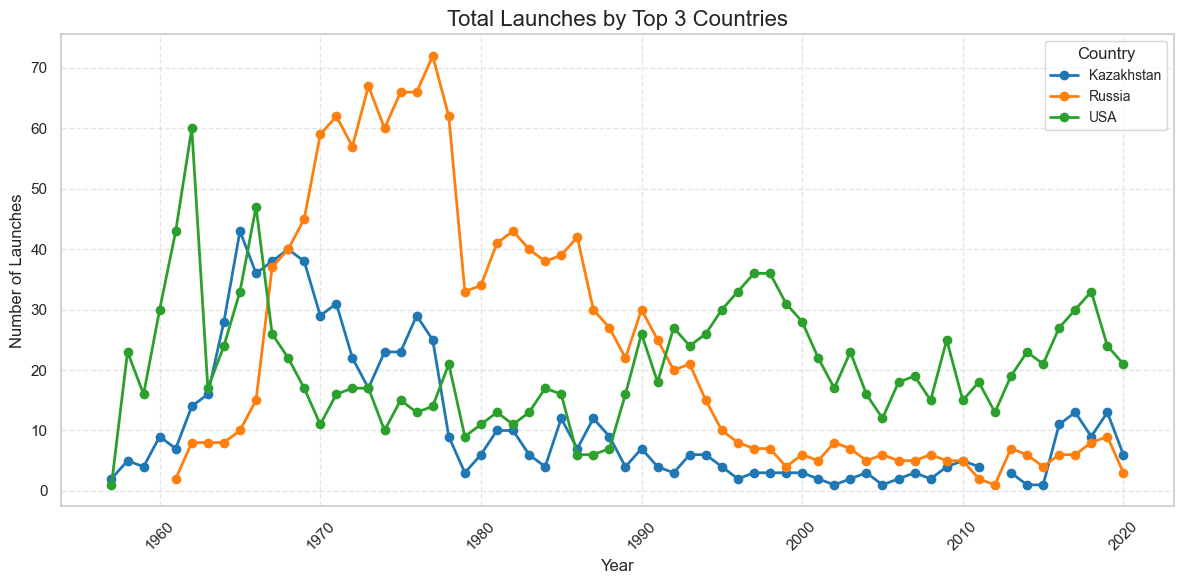

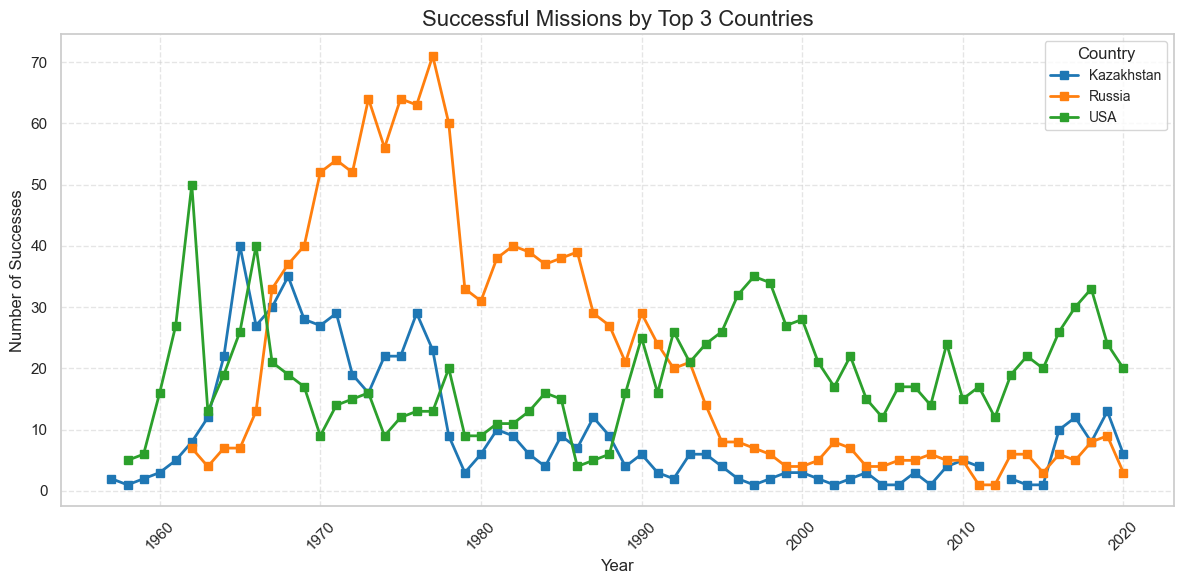

In [15]:
# top 3 Countries over time in terms of success and launches.
# Merge Russian military organizations
df['Organisation'] = df['Organisation'].replace({
    'RVSN USSR': 'Russia Military',
    'VKS RF': 'Russia Military'
})

# Top 3 countries by launch count
top_countries = df['Country'].value_counts().head(3).index.tolist()
df_top = df[df['Country'].isin(top_countries)]

# Grouped launch and success counts
launches = df_top.groupby(['Year', 'Country']).size().unstack()
successes = df_top[df_top['Mission_Status'] == 'Success'].groupby(['Year', 'Country']).size().unstack()

# Optional: Calculate success rate
success_rate = (successes / launches).fillna(0)

# Print last few years
print("Launches per Year by Top 3 Countries:\n", launches.tail())
print("\n Successes per Year by Top 3 Countries:\n", successes.tail())

# ---------------------------
# Plotting Function
# ---------------------------
def plot_trends(data, title, ylabel, markers, colors):
    ax = data.plot(figsize=(12, 6), marker=markers, color=colors, linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Country', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plot: Launches
plot_trends(launches, "Total Launches by Top 3 Countries", "Number of Launches", 'o', colors)

# Plot: Successes
plot_trends(successes, "Successful Missions by Top 3 Countries", "Number of Successes", 's', colors)


In [ ]:


# Combine Russian military orgs
df['Organisation'] = df['Organisation'].replace({
    'RVSN USSR': 'Russia Military',
    'VKS RF': 'Russia Military'
})

# Get top 3 countries by total launches
top_countries = df['Country'].value_counts().head(3).index
top_country_df = df[df['Country'].isin(top_countries)]

# Group by year and country
launches_by_country = top_country_df.groupby(['Year', 'Country']).size().unstack()
success_by_country = top_country_df[top_country_df['Mission_Status'] == 'Success'] \
    .groupby(['Year', 'Country']).size().unstack()

# Display sample data
print("🚀 Launches per Year by Top 3 Countries:\n", launches_by_country.tail())
print("\n✅ Successes per Year by Top 3 Countries:\n", success_by_country.tail())

# Plot styling
plt.style.use('seaborn-whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Plot total launches
ax1 = launches_by_country.plot(kind='line', marker='o', figsize=(12, 6), color=colors)
plt.title("🚀 Total Launches by Top 3 Countries Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot successful missions
ax2 = success_by_country.plot(kind='line', marker='s', figsize=(12, 6), color=colors)
plt.title("✅ Successful Missions by Top 3 Countries Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Successful Missions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [3]:
#2. Most Reused Rockets

rocket_counts = df['Detail'].value_counts()
reused_rockets = rocket_counts[rocket_counts > 1]

print("\n2. Most Reused Rockets:\n", reused_rockets.head())


2. Most Reused Rockets:
 Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
Name: Detail, dtype: int64



3. Average Launch Cost by Decade (in million USD):
 Decade
1950     95.950980
1960     71.254031
1970     54.947134
1980     81.749287
1990    125.746121
2000    116.516779
2010     83.939601
2020     54.570000
Name: Price, dtype: float64


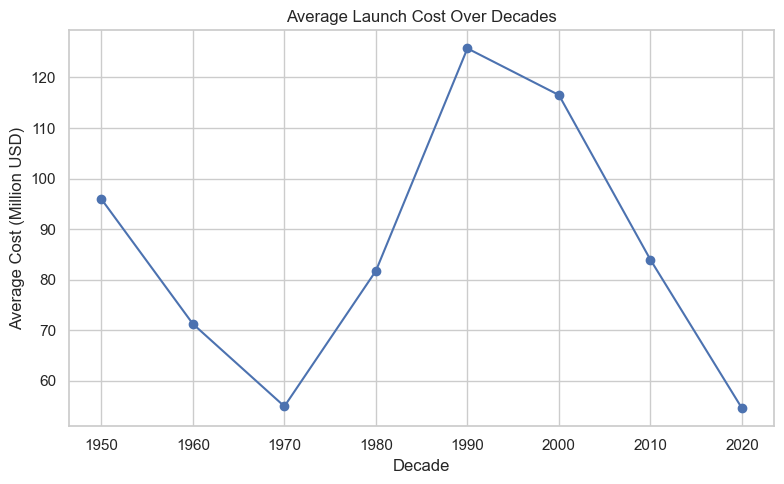

In [4]:
# 3. Cost Trends Over Decades
df['Decade'] = (df['Year'] // 10) * 10
cost_by_decade = df.groupby('Decade')['Price'].mean()

print("\n3. Average Launch Cost by Decade (in million USD):\n", cost_by_decade)

cost_by_decade.plot(kind='line', marker='o', title="Average Launch Cost Over Decades", figsize=(8, 5))
plt.ylabel("Average Cost (Million USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



4. Mission Count by Type:
 Government    4199
Private        125
Name: Type, dtype: int64

4. Success Rate by Type:
 Type
Government    0.895928
Private       0.936000
dtype: float64


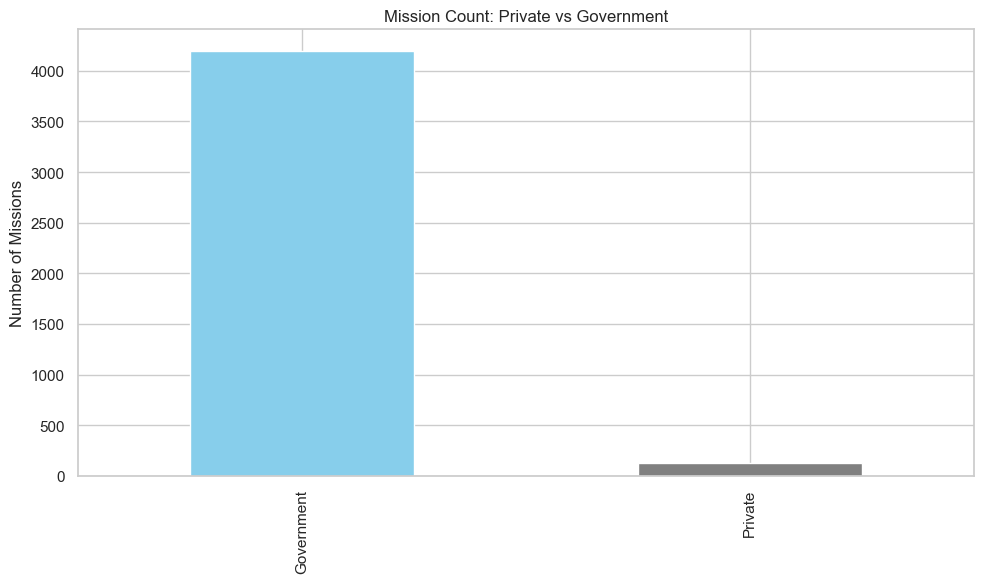

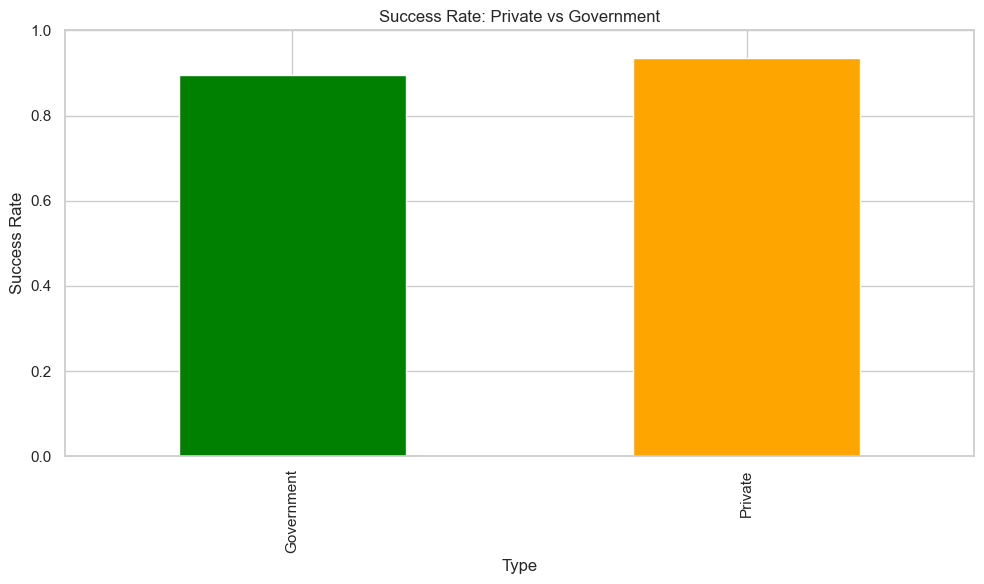

In [5]:
# 4. Private vs Government Missions

private_orgs = ['SpaceX', 'Blue Origin', 'Rocket Lab']
df['Type'] = df['Organisation'].apply(lambda x: 'Private' if x in private_orgs else 'Government')

mission_count = df['Type'].value_counts()
success_rate = df[df['Mission_Status'] == 'Success'].groupby('Type').size() / df.groupby('Type').size()

print("\n4. Mission Count by Type:\n", mission_count)
print("\n4. Success Rate by Type:\n", success_rate)

mission_count.plot(kind='bar', title="Mission Count: Private vs Government", color=['skyblue', 'gray'])
plt.ylabel("Number of Missions")
plt.tight_layout()
plt.show()

success_rate.plot(kind='bar', title="Success Rate: Private vs Government", color=['green', 'orange'])
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()